In [1]:
import numpy as np
import pandas as pd

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
%matplotlib inline
sns.set()

In [3]:
iris_df = pd.read_csv('../../data/iris.csv', dtype = {'species': 'category'})
iris_df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa


In [4]:
advert_df = pd.read_csv('../../data/advert.csv', index_col = 0)
advert_df.columns = advert_df.columns.str.lower()
advert_df.head()

,tv,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
X_iris = iris_df.iloc[:, :-1]
y_iris = iris_df.species

# Model Selection

In [6]:
knn = KNeighborsClassifier(n_neighbors = 17)
cross_val_score(knn, X_iris, y_iris, cv = 10, scoring = 'accuracy', n_jobs = -1).mean()

0.97333333333333338

In [7]:
logreg = LogisticRegression()
cross_val_score(logreg, X_iris, y_iris, cv = 10, scoring = 'accuracy', n_jobs = -1).mean()

0.95333333333333337

> Yay KNN Rocks

# Feature Selection

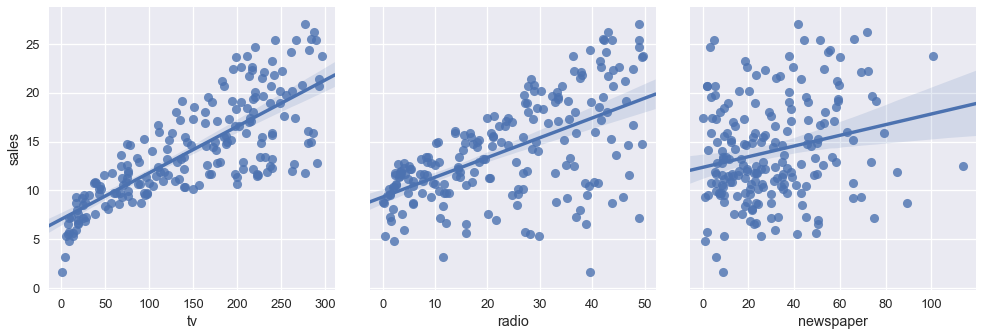

In [8]:
sns.set_context('talk')
sns.pairplot(advert_df, x_vars = ['tv', 'radio', 'newspaper'], y_vars = 'sales', kind = 'reg', size = 5, aspect = 0.94)
plt.show()

> Newspaper doesn't look like it belong here

In [9]:
linreg = LinearRegression()

In [10]:
featured_cols = ['tv', 'radio', 'newspaper']

X_advert = advert_df[featured_cols]
y_advert = advert_df.sales

np.sqrt(-cross_val_score(linreg, X_advert, y_advert, cv = 10, scoring = 'neg_mean_squared_error')).mean()

1.6913531708051792

In [11]:
featured_cols = ['tv', 'radio']

X_advert = advert_df[featured_cols]

np.sqrt(-cross_val_score(linreg, X_advert, y_advert, cv = 10, scoring = 'neg_mean_squared_error')).mean()

1.6796748419090766

> Lower RMSE is better, hence kicking out _newspaper_ as a featured column is a good decision